In [1]:
import os
import sys
import time
import torch
import torchvision
import numpy as np
from glob import glob
from tqdm import tqdm

In [2]:
from dataloader.videodataset import VideoDataset
from dataloader.i3ddataset import I3DDataset
from torch.utils.data import DataLoader
from tensorboardX import SummaryWriter

from spatial_transforms import Compose
from spatial_transforms import Normalize
from spatial_transforms import Scale
from spatial_transforms import CenterCrop
from spatial_transforms import RandomHorizontalFlip
from spatial_transforms import RandomAffine
from spatial_transforms import RandomRotation
from spatial_transforms import ColorJitter
from spatial_transforms import ToTensor #ExtractSkinColor
from temporal_transforms import TemporalRandomChoice
from temporal_transforms import TemporalRandomCrop
from temporal_transforms import LoopPadding, MirrorPadding, MirrorLoopPadding 

In [3]:
VIDEO_DIR='./data/videos/simulate' #/data/videos
CLIP_LEN = 16
CLIP_LEN_AUG = CLIP_LEN/2
BATCH_SIZE = 16

IMG_SIZE = 224
MEAN=[110.63666788, 103.16065604, 96.29023126]
STD=[38.7568578, 37.88248729, 40.02898126]
MEAN=[128, 128, 128]
STD=[128, 128, 128]
spatial_transform = {
    'train': Compose([Scale(IMG_SIZE),
                      CenterCrop(IMG_SIZE),
                      #RandomHorizontalFlip(),
                      #ColorJitter(brightness=0.1),
                      #RandomAffine(5),
                      #RandomRotation(2.5),
                      ToTensor(1), 
                      Normalize(MEAN, STD)]),
    'val': Compose([Scale(IMG_SIZE), 
                    CenterCrop(IMG_SIZE), 
                    ToTensor(1), 
                    Normalize(MEAN, STD)])}

temporal_transform = Compose([
            TemporalRandomCrop(CLIP_LEN_AUG),
            TemporalRandomChoice([
                LoopPadding(CLIP_LEN),
                MirrorPadding(CLIP_LEN),
                MirrorLoopPadding(CLIP_LEN)])])

In [7]:
dataset_test = I3DDataset(os.path.join(VIDEO_DIR, 'test'), 
                        frames_per_clip=CLIP_LEN,
                        frame_rate=15,
                        spatial_transform=spatial_transform['val'])

In [7]:
dataset = {
    'train': I3DDataset(os.path.join(VIDEO_DIR, 'train'), 
                          frames_per_clip=CLIP_LEN,
                          #temporal_transform=temporal_transform,
                          spatial_transform=spatial_transform['train']),
    'val': I3DDataset(os.path.join(VIDEO_DIR, 'val'), 
                        frames_per_clip=CLIP_LEN,
                        spatial_transform=spatial_transform['val']),
    'test': I3DDataset(os.path.join(VIDEO_DIR, 'test'), 
                        frames_per_clip=CLIP_LEN,
                        spatial_transform=spatial_transform['val'])
}
dataloaders = {
    'train': DataLoader(dataset['train'], batch_size=BATCH_SIZE, shuffle=True, num_workers=16),
    'val': DataLoader(dataset['val'], batch_size=BATCH_SIZE, shuffle=False, num_workers=16)}

In [8]:
from torchvision.datasets.video_utils import VideoClips
samples = dataset_test.samples
video_list = [x[0] for x in samples if 'flow' not in x[0]]
optflow_list = [x[0] for x in samples if 'flow' in x[0]]
video_clips = VideoClips(video_list, 16, 1)
optflow_clips = VideoClips(optflow_list, 16, 1)
print(len(video_list))
print(len(optflow_list))
print(len(video_clips))
print(len(optflow_clips))

27
27
900
873


In [10]:
video_list[0]

'./data/videos/simulate/test/clean/38_20190119_frames005327.mp4'

In [9]:
i=12
print(video_clips.get_clip_location(i))
print(optflow_clips.get_clip_location(i))

(0, 12)
(1, 0)


In [10]:
for i in range(len(video_clips)):
    if video_clips.get_clip_location(i) != optflow_clips.get_clip_location(i):
        print(i)

12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283


In [26]:
optflow_list

['./data/videos/simulate/val/clean/flow/38_20190119_frames000109.mp4',
 './data/videos/simulate/val/clean/flow/38_20190119_frames000247.mp4',
 './data/videos/simulate/val/clean/flow/38_20190119_frames000270.mp4',
 './data/videos/simulate/val/clean/flow/38_20190119_frames000447.mp4',
 './data/videos/simulate/val/clean/flow/38_20190119_frames000640.mp4',
 './data/videos/simulate/val/clean/flow/38_20190119_frames001069.mp4',
 './data/videos/simulate/val/clean/flow/38_20190119_frames001576.mp4',
 './data/videos/simulate/val/clean/flow/38_20190119_frames002381.mp4',
 './data/videos/simulate/val/clean/flow/38_20190119_frames002588.mp4',
 './data/videos/simulate/val/clean/flow/38_20190119_frames002743.mp4',
 './data/videos/simulate/val/clean/flow/38_20190119_frames003766.mp4',
 './data/videos/simulate/val/clean/flow/38_20190119_frames003896.mp4',
 './data/videos/simulate/val/clean/flow/38_20190119_frames004283.mp4',
 './data/videos/simulate/val/notclean/flow/38_20190119_frames000611.mp4',
 '.

In [18]:
sorted(optflow_list)

['./data/videos/simulate/train/clean/flow/1_20180806_frames001060.mp4',
 './data/videos/simulate/train/clean/flow/1_20180806_frames001118.mp4',
 './data/videos/simulate/train/clean/flow/1_20180806_frames001191.mp4',
 './data/videos/simulate/train/clean/flow/1_20180806_frames001229.mp4',
 './data/videos/simulate/train/clean/flow/38_20190119_frames000159.mp4',
 './data/videos/simulate/train/clean/flow/38_20190119_frames000187.mp4',
 './data/videos/simulate/train/clean/flow/38_20190119_frames000213.mp4',
 './data/videos/simulate/train/clean/flow/38_20190119_frames000300.mp4',
 './data/videos/simulate/train/clean/flow/38_20190119_frames000382.mp4',
 './data/videos/simulate/train/clean/flow/38_20190119_frames000431.mp4',
 './data/videos/simulate/train/clean/flow/38_20190119_frames000538.mp4',
 './data/videos/simulate/train/clean/flow/38_20190119_frames000592.mp4',
 './data/videos/simulate/train/clean/flow/38_20190119_frames000858.mp4',
 './data/videos/simulate/train/clean/flow/38_20190119_f

In [8]:
video, optflow, label =dataset['train'].__getitem__(0)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


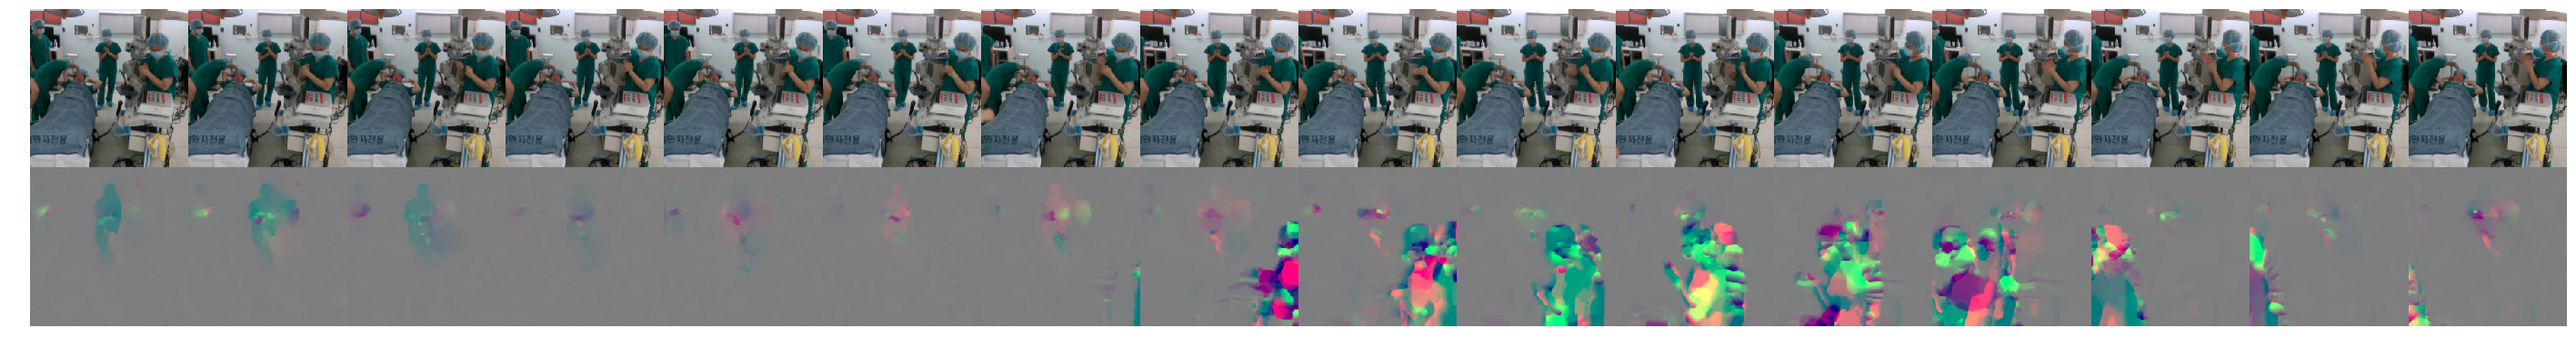

tensor([0])


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
def show_dataset(item): # item: C x D x 244 x 244
    rgbs = item[0].transpose(0, 1)
    flows = item[1].transpose(0, 1)
    n = len(rgbs)
    shape = np.asarray(flows[0]).shape
    rgb = np.hstack((np.asarray(rgb).transpose(1, 2, 0)+1)/2 for rgb in rgbs)
    tmp = np.zeros((shape[1], shape[2], 1))
    flow = np.hstack((np.dstack((np.asarray(flow).transpose(1, 2, 0), tmp))+1)/2 for flow in flows)

    img = np.vstack((rgb, flow))
    plt.figure(figsize=(50, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    print(item[2])
    
i=200
phase='val'
show_dataset(dataset[phase].__getitem__(i))

In [3]:
model_name = 'i3d'
batch_size = 16
clip_len = 16
sample_duration = clip_len
num_classes = 1

#torch.manual_seed(100)
data_name = 'anesthesia'
dataset_path = os.path.join(os.getcwd(), 'data')

In [4]:
sample_size = 224
#mean=[110.63666788, 103.16065604, 96.29023126]
#std=[38.7568578, 37.88248729, 40.02898126]
mean=[128, 128, 128]
std=[128, 128, 128]

scales=np.linspace(1, 1.75, num=1e3)
center=((1+1.75)/2)
openpose_transform = {
    'train':MultiScaleTorsoRandomCrop(scales, sample_size),
    'val':MultiScaleTorsoRandomCrop(np.linspace(center, center, num=1), sample_size, centercrop=True)
}
spatial_transform = {
    'train': Compose([Scale(sample_size),
                      CenterCrop(sample_size),
                      RandomHorizontalFlip(),
                      ColorJitter(brightness=0.1),
                      RandomAffine(5),
                      RandomRotation(2.5),
                      ToTensor(1), 
                      Normalize(mean, std)]),
    'val': Compose([Scale(sample_size), 
                    CenterCrop(sample_size), 
                    ToTensor(1), 
                    Normalize(mean, std)])}
temporal_transform = {
    'train': TemporalRandomChoice([
            TemporalBeginCrop(sample_duration),
            MirrorPadding(sample_duration)]),
    'val':TemporalBeginCrop(sample_duration)}

In [5]:
dataset = {
    'train':VideoFolder(dataset_path, split='train', clip_len=clip_len, 
                        spatial_transform=spatial_transform['train'],
                        temporal_transform=temporal_transform['train']),
    'val':VideoFolder(dataset_path, split='val', clip_len=clip_len, 
                        spatial_transform=spatial_transform['val'],
                        temporal_transform=temporal_transform['val']),
    'test':VideoFolder(dataset_path, split='test', clip_len=clip_len, 
                        spatial_transform=spatial_transform['val'],
                        temporal_transform=temporal_transform['val'])}

dataloaders = {
    'train': DataLoader(dataset['train'], batch_size=batch_size, shuffle=True, num_workers=16),
    'val': DataLoader(dataset['val'], batch_size=1, shuffle=False, num_workers=16)}

Number of /data/private/minjee-video/handhygiene/data/images/train videos: 1332
Number of /data/private/minjee-video/handhygiene/data/images/val videos: 453
Number of /data/private/minjee-video/handhygiene/data/images/test videos: 395


# TEST DATA SPLITTING

In [65]:
from sklearn.model_selection import train_test_split
# for path in sorted(glob('./data/videos/simulate/clean/*.mp4'))[-17:]:
#     !mv $path /data/private/minjee-video/handhygiene/data/videos/simulate/test/clean
for mod in ['images']:
    ext = '.mp4' if mod == 'videos' else ''
    for path in sorted(glob('./data/{}/simulate/notclean/*{}'.format(mod, ext)))[-10:]:
        path = path.replace('videos', mod)
        dst = '/data/private/minjee-video/handhygiene/data/{}/simulate/test/notclean'.format(mod)

./data/images/simulate/notclean/38_20190119_frames005592 /data/private/minjee-video/handhygiene/data/images/simulate/test/notclean
./data/images/simulate/notclean/38_20190119_frames005812 /data/private/minjee-video/handhygiene/data/images/simulate/test/notclean
./data/images/simulate/notclean/38_20190119_frames005869 /data/private/minjee-video/handhygiene/data/images/simulate/test/notclean
./data/images/simulate/notclean/38_20190119_frames005961 /data/private/minjee-video/handhygiene/data/images/simulate/test/notclean
./data/images/simulate/notclean/38_20190119_frames006051 /data/private/minjee-video/handhygiene/data/images/simulate/test/notclean
./data/images/simulate/notclean/38_20190119_frames006093 /data/private/minjee-video/handhygiene/data/images/simulate/test/notclean
./data/images/simulate/notclean/38_20190119_frames006247 /data/private/minjee-video/handhygiene/data/images/simulate/test/notclean
./data/images/simulate/notclean/38_20190119_frames006454 /data/private/minjee-video

In [72]:
for mod in ['images']:
    ext = '.mp4' if mod == 'videos' else ''
    for label in ['notclean']:
        VIDEOS = sorted(glob('./data/{}/simulate/{}/*{}'.format(mod, label, ext)))
        #VIDEO_TRAIN, VIDEO_VAL = train_test_split(VIDEOS, test_size=0.2, random_state=42)
        VIDEO_DATA = {'train': VIDEO_TRAIN, 'val': VIDEO_VAL}
        for phase in ['train', 'val']:
            paths = VIDEO_DATA[phase]
            for path in paths:
                path = path.replace('videos', mod)
                dst = './data/{}/simulate/{}/{}/'.format(mod, phase, label)
                !mv $path $dst

In [71]:
VIDEO_VAL = [os.path.splitext(path.replace('videos','images'))[0] for path in VIDEO_VAL]